In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from scipy.stats import skew

In [6]:
data = fetch_california_housing()
X = data.data
y = data.target
print("X sample : ", X[0])
print("Y sample : ",y[0])

X sample :  [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
Y sample :  4.526


In [7]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [10]:
eda = pd.DataFrame(data = X_train)
eda.columns = data.feature_names
eda.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
1,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
2,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
3,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
4,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [11]:
eda['MedHouseVal'] = y_train
eda.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030
1,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821
2,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726
3,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,0.934
4,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,0.965


In [12]:
eda.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Median house distribution plot**

Text(0, 0.5, 'Frequency')

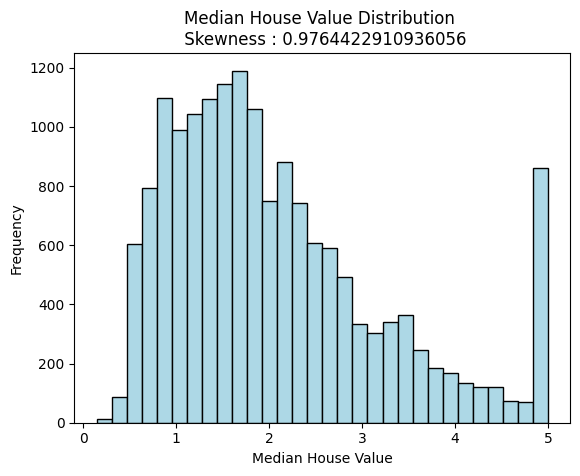

In [13]:
plt.hist(y_train , bins=30 , color="lightblue" , edgecolor = "black")
plt.title(f'Median House Value Distribution \n Skewness : {skew(y_train)}')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")

Model Fitting and Prediction

In [15]:
RandomForest = RandomForestRegressor(n_estimators=100 , random_state=42)
RandomForest.fit(X_train , y_train)
y_pred_test = RandomForest.predict(X_test)

In [16]:
mae = mean_absolute_error(y_pred_test , y_test)
mse = mean_squared_error(y_pred_test , y_test)
rmse = root_mean_squared_error(y_pred_test , y_test)
r2 = r2_score(y_pred_test , y_test)
print(f'Mean Squared Error : {mse:.2f}')
print(f'Root Mean Squared Error : {rmse:.2f}')
print(f'Mean Absolute Error : {mae:.2f}')
print(f'R2 Score : {r2:.2f}')

Mean Squared Error : 0.26
Root Mean Squared Error : 0.51
Mean Absolute Error : 0.33
R2 Score : 0.75


Text(0, 0.5, 'Predicted Values')

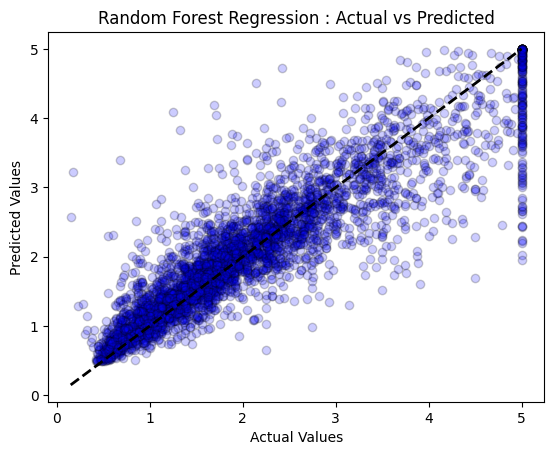

In [21]:
plt.scatter(y_test , y_pred_test , alpha=0.2 , color = 'blue' , edgecolors='black')
plt.plot([y_test.min() , y_test.max()] , [y_test.min() , y_test.max()] , "k--" , lw=2)
plt.title("Random Forest Regression : Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Plotting Histogram plot of errors / residuals

Text(0, 0.5, 'Frequency')

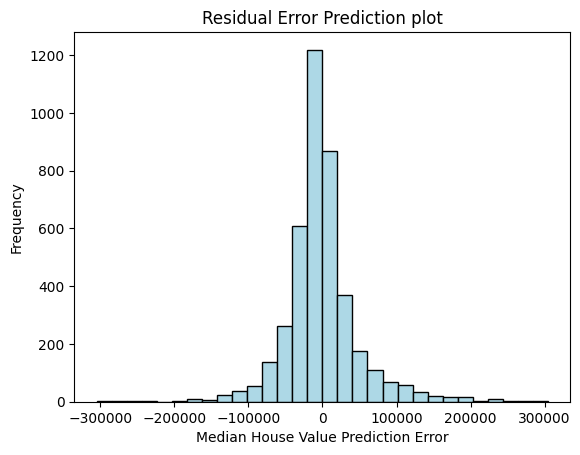

In [22]:
residuals = 100000 * (y_test - y_pred_test)

plt.hist(residuals , bins=30 , color="lightblue", edgecolor = "black")
plt.title("Residual Error Prediction plot")
plt.xlabel("Median House Value Prediction Error")
plt.ylabel("Frequency")

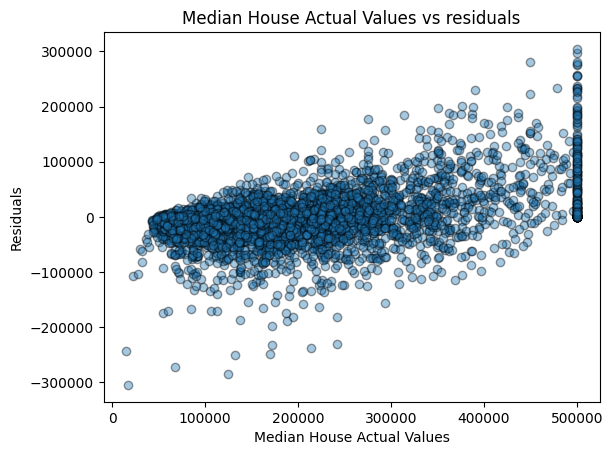

In [23]:
plt.scatter(100000 * y_test , residuals , marker='o' , alpha=0.4 , ec = 'k')
plt.title("Median House Actual Values vs residuals")
plt.xlabel("Median House Actual Values")
plt.ylabel("Residuals")
plt.show()

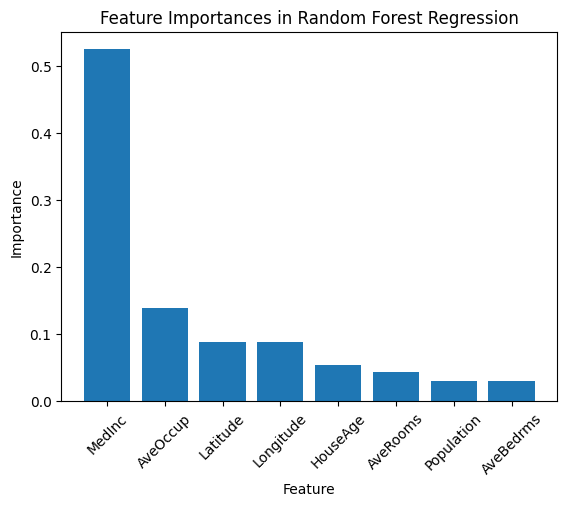

In [25]:
# Feature importances
importances = RandomForest.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.feature_names

# Plot feature importances
plt.bar(range(X.shape[1]), importances[indices],  align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Regression")
plt.show()